In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataPath='/content/data.csv'

df=pd.read_csv(dataPath)
print(df.shape)

(17483, 21)


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# preprocessing


In [ ]:
df.rename(columns={'default':'has-credit', 'housing':'housing-loan','loan':'personal-loan','nr.employed:':'no-employees','y':'target'}, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'has-credit', 'housing-loan',
       'personal-loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education,has-credit,housing-loan,personal-loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe(include="all")

,age,job,marital,education,has-credit,housing-loan,personal-loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,17483.000000,17483,17483,17483,17483,17483,17483,17483,17483,17483,...,17483.000000,17483.0,17483.0,17482,17482.000000,17482.000000,17482.000000,17482.000000,17482.000000,17482
unique,NaN,12,4,8,2,3,3,2,3,5,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,2
top,NaN,blue-collar,married,high.school,no,no,no,telephone,may,mon,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,5177,11069,4261,12258,8776,14432,12915,7763,3619,...,NaN,NaN,NaN,17482,NaN,NaN,NaN,NaN,NaN,16708
mean,39.664703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.801293,999.0,0.0,NaN,1.266783,94.088608,-39.677262,4.907744,5211.625495,NaN
std,9.297423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.155702,0.0,0.0,NaN,0.149062,0.219824,2.948021,0.051081,18.434052,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.0,0.0,NaN,1.100000,93.918000,-42.700000,4.855000,5191.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.0,0.0,NaN,1.100000,93.918000,-42.700000,4.857000,5191.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.0,0.0,NaN,1.400000,93.994000,-41.800000,4.865500,5228.100000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.0,0.0,NaN,1.400000,94.465000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17483 entries, 0 to 17482
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             17483 non-null  int64  
 1   job             17483 non-null  object 
 2   marital         17483 non-null  object 
 3   education       17483 non-null  object 
 4   has-credit      17483 non-null  object 
 5   housing-loan    17483 non-null  object 
 6   personal-loan   17483 non-null  object 
 7   contact         17483 non-null  object 
 8   month           17483 non-null  object 
 9   day_of_week     17483 non-null  object 
 10  duration        17483 non-null  int64  
 11  campaign        17483 non-null  int64  
 12  pdays           17483 non-null  int64  
 13  previous        17483 non-null  int64  
 14  poutcome        17482 non-null  object 
 15  emp.var.rate    17482 non-null  float64
 16  cons.price.idx  17482 non-null  float64
 17  cons.conf.idx   17482 non-null 

In [ ]:
df.nunique()

age                 43
job                 12
marital              4
education            8
has-credit           2
housing-loan         3
personal-loan        3
contact              2
month                3
day_of_week          5
duration          1296
campaign            42
pdays                1
previous             1
poutcome             1
emp.var.rate         2
cons.price.idx       3
cons.conf.idx        3
euribor3m           21
nr.employed          2
target               2
dtype: int64

# visualization

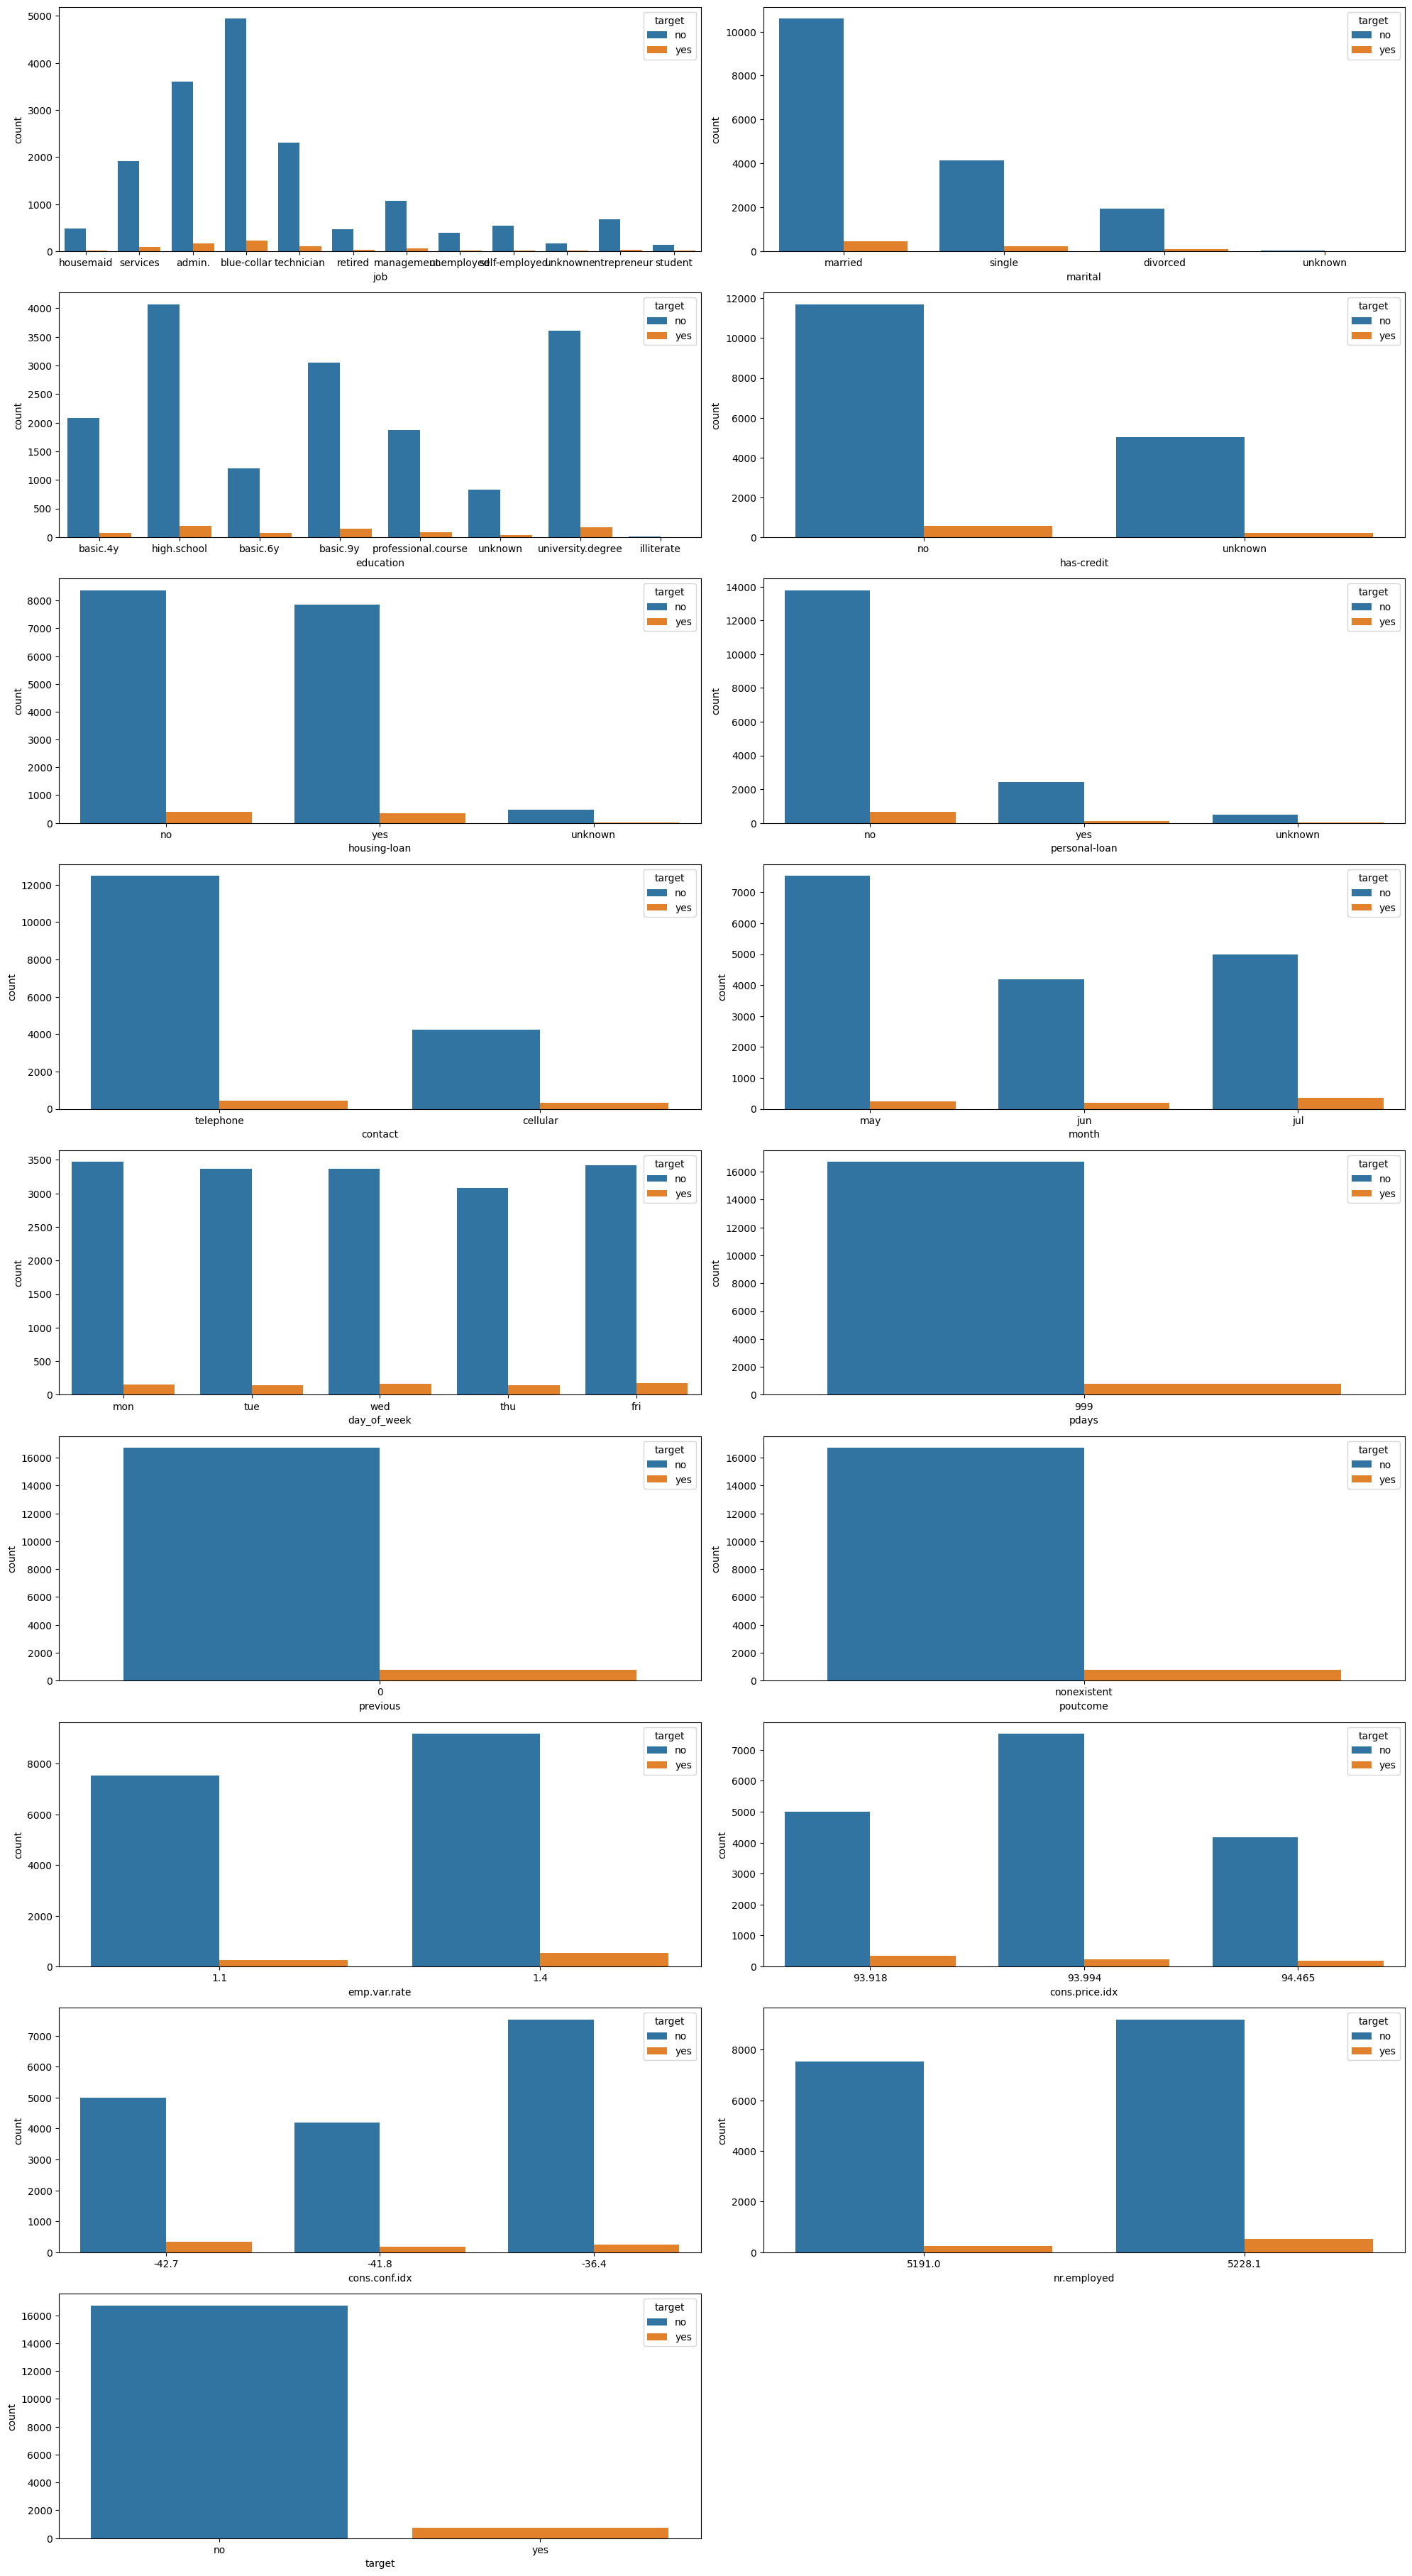

In [ ]:
ccountount column_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

plt.figure(figsize=(20,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col,hue='target')
    plot_num += 1
    plt.tight_layout()

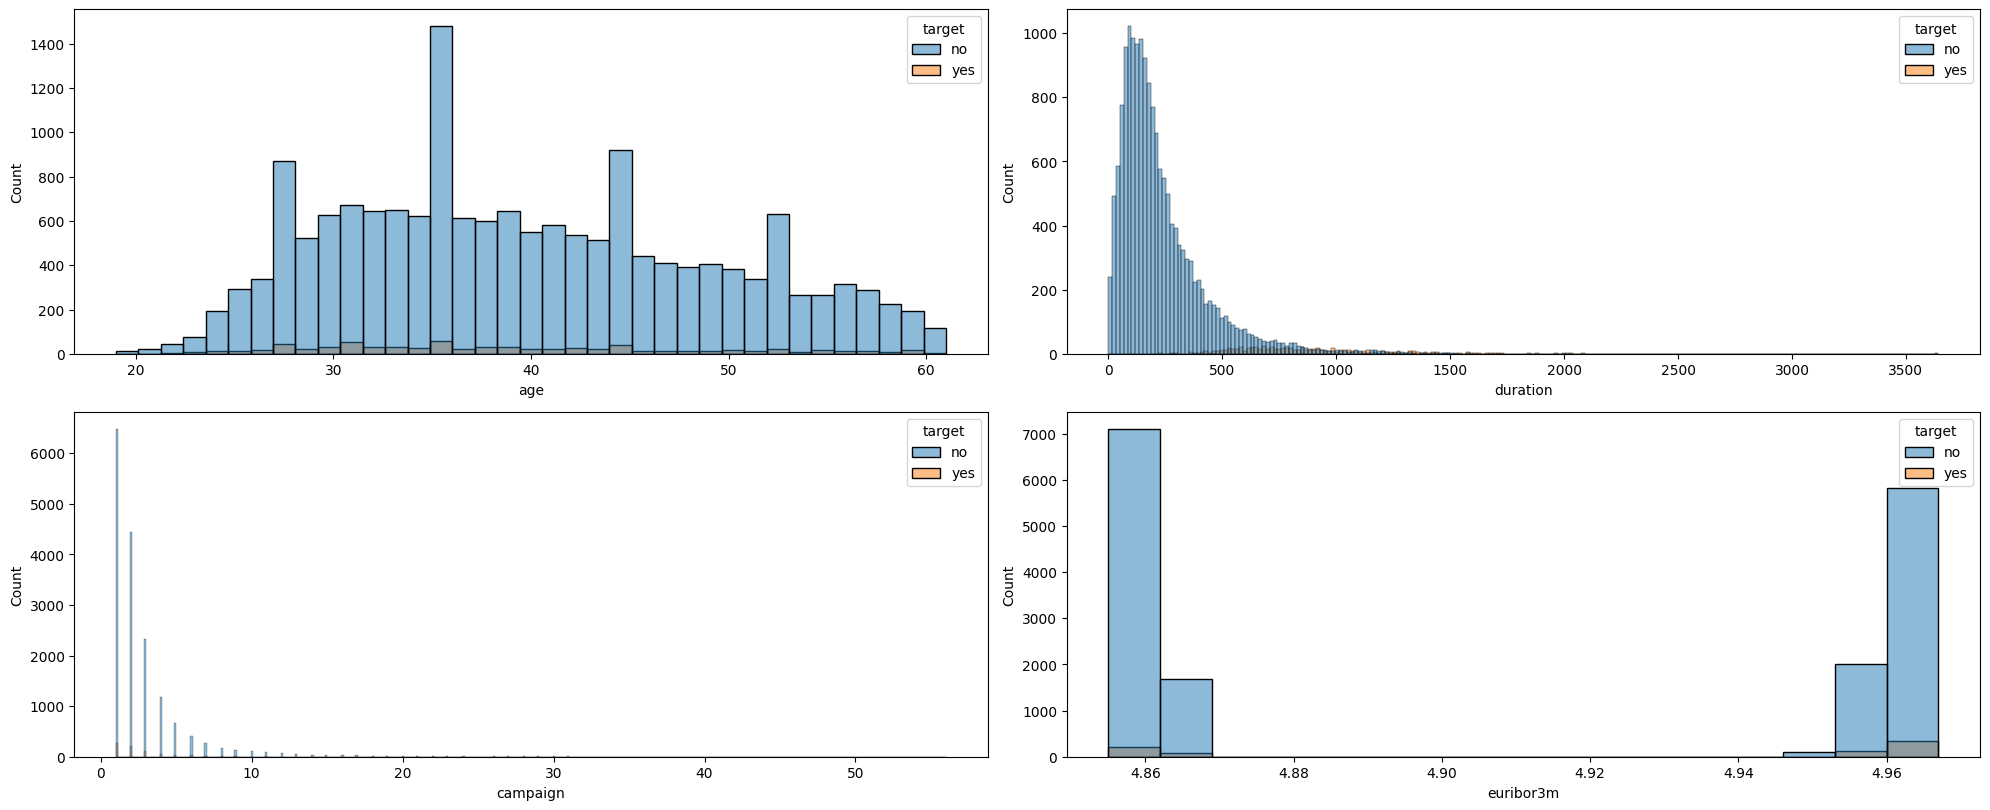

In [ ]:
plt.figure(figsize=(20,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,hue='target')
    plot_num += 1
    plt.tight_layout()


# data balancing

In [ ]:
df['target'].value_counts()

target
no     16708
yes      774
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

df_major=df[(df['target']=='no')]
df_min=df[(df['target']=='yes')]

df_min_upsampled=resample(df_min,
                          replace=True,
                          n_samples=36548,
                          random_state=42)
df_upsampled=pd.concat([df_min_upsampled,df_major])

In [ ]:
df_upsampled['target'].value_counts()

target
yes    36548
no     16708
Name: count, dtype: int64

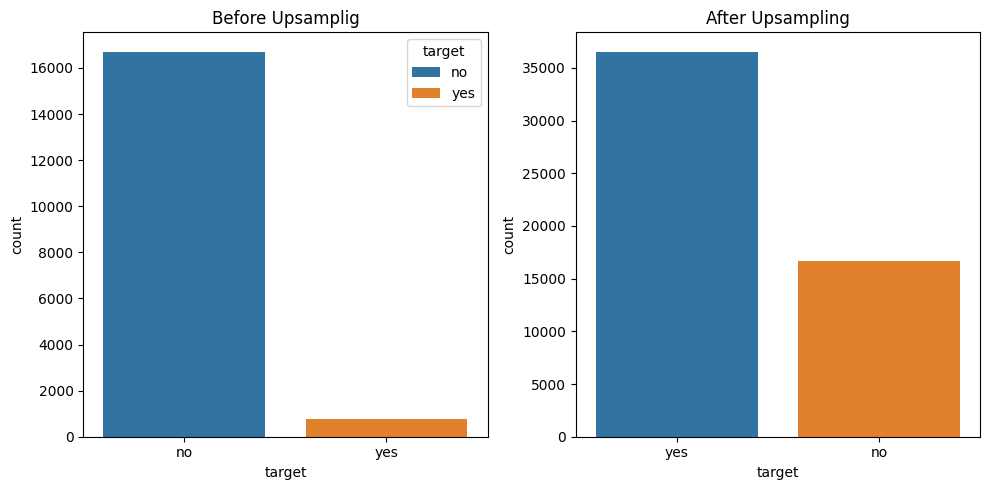

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x=df['target'],data=df, ax=ax[0],hue='target')
sns.countplot(x=df_upsampled['target'],data=df_upsampled, ax=ax[1],hue='target')
ax[0].set_title("Before Upsamplig")
ax[1].set_title("After Upsampling")

# set spacing
fig.tight_layout()
plt.show()

#  Convert categorical data to numerical data

In [ ]:
df_upsampled['target'] = df_upsampled['target'].replace({'no': 0, 'yes': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_upsampled.columns:
    if df_upsampled[column].dtype == 'object':
        df_upsampled[column] = label_encoder.fit_transform(df_upsampled[column].astype(str))
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53256 entries, 3697 to 17481
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             53256 non-null  int64  
 1   job             53256 non-null  int64  
 2   marital         53256 non-null  int64  
 3   education       53256 non-null  int64  
 4   has-credit      53256 non-null  int64  
 5   housing-loan    53256 non-null  int64  
 6   personal-loan   53256 non-null  int64  
 7   contact         53256 non-null  int64  
 8   month           53256 non-null  int64  
 9   day_of_week     53256 non-null  int64  
 10  duration        53256 non-null  int64  
 11  campaign        53256 non-null  int64  
 12  pdays           53256 non-null  int64  
 13  previous        53256 non-null  int64  
 14  poutcome        53256 non-null  int64  
 15  emp.var.rate    53256 non-null  float64
 16  cons.price.idx  53256 non-null  float64
 17  cons.conf.idx   53256 non-null  f

# visualization of numerical

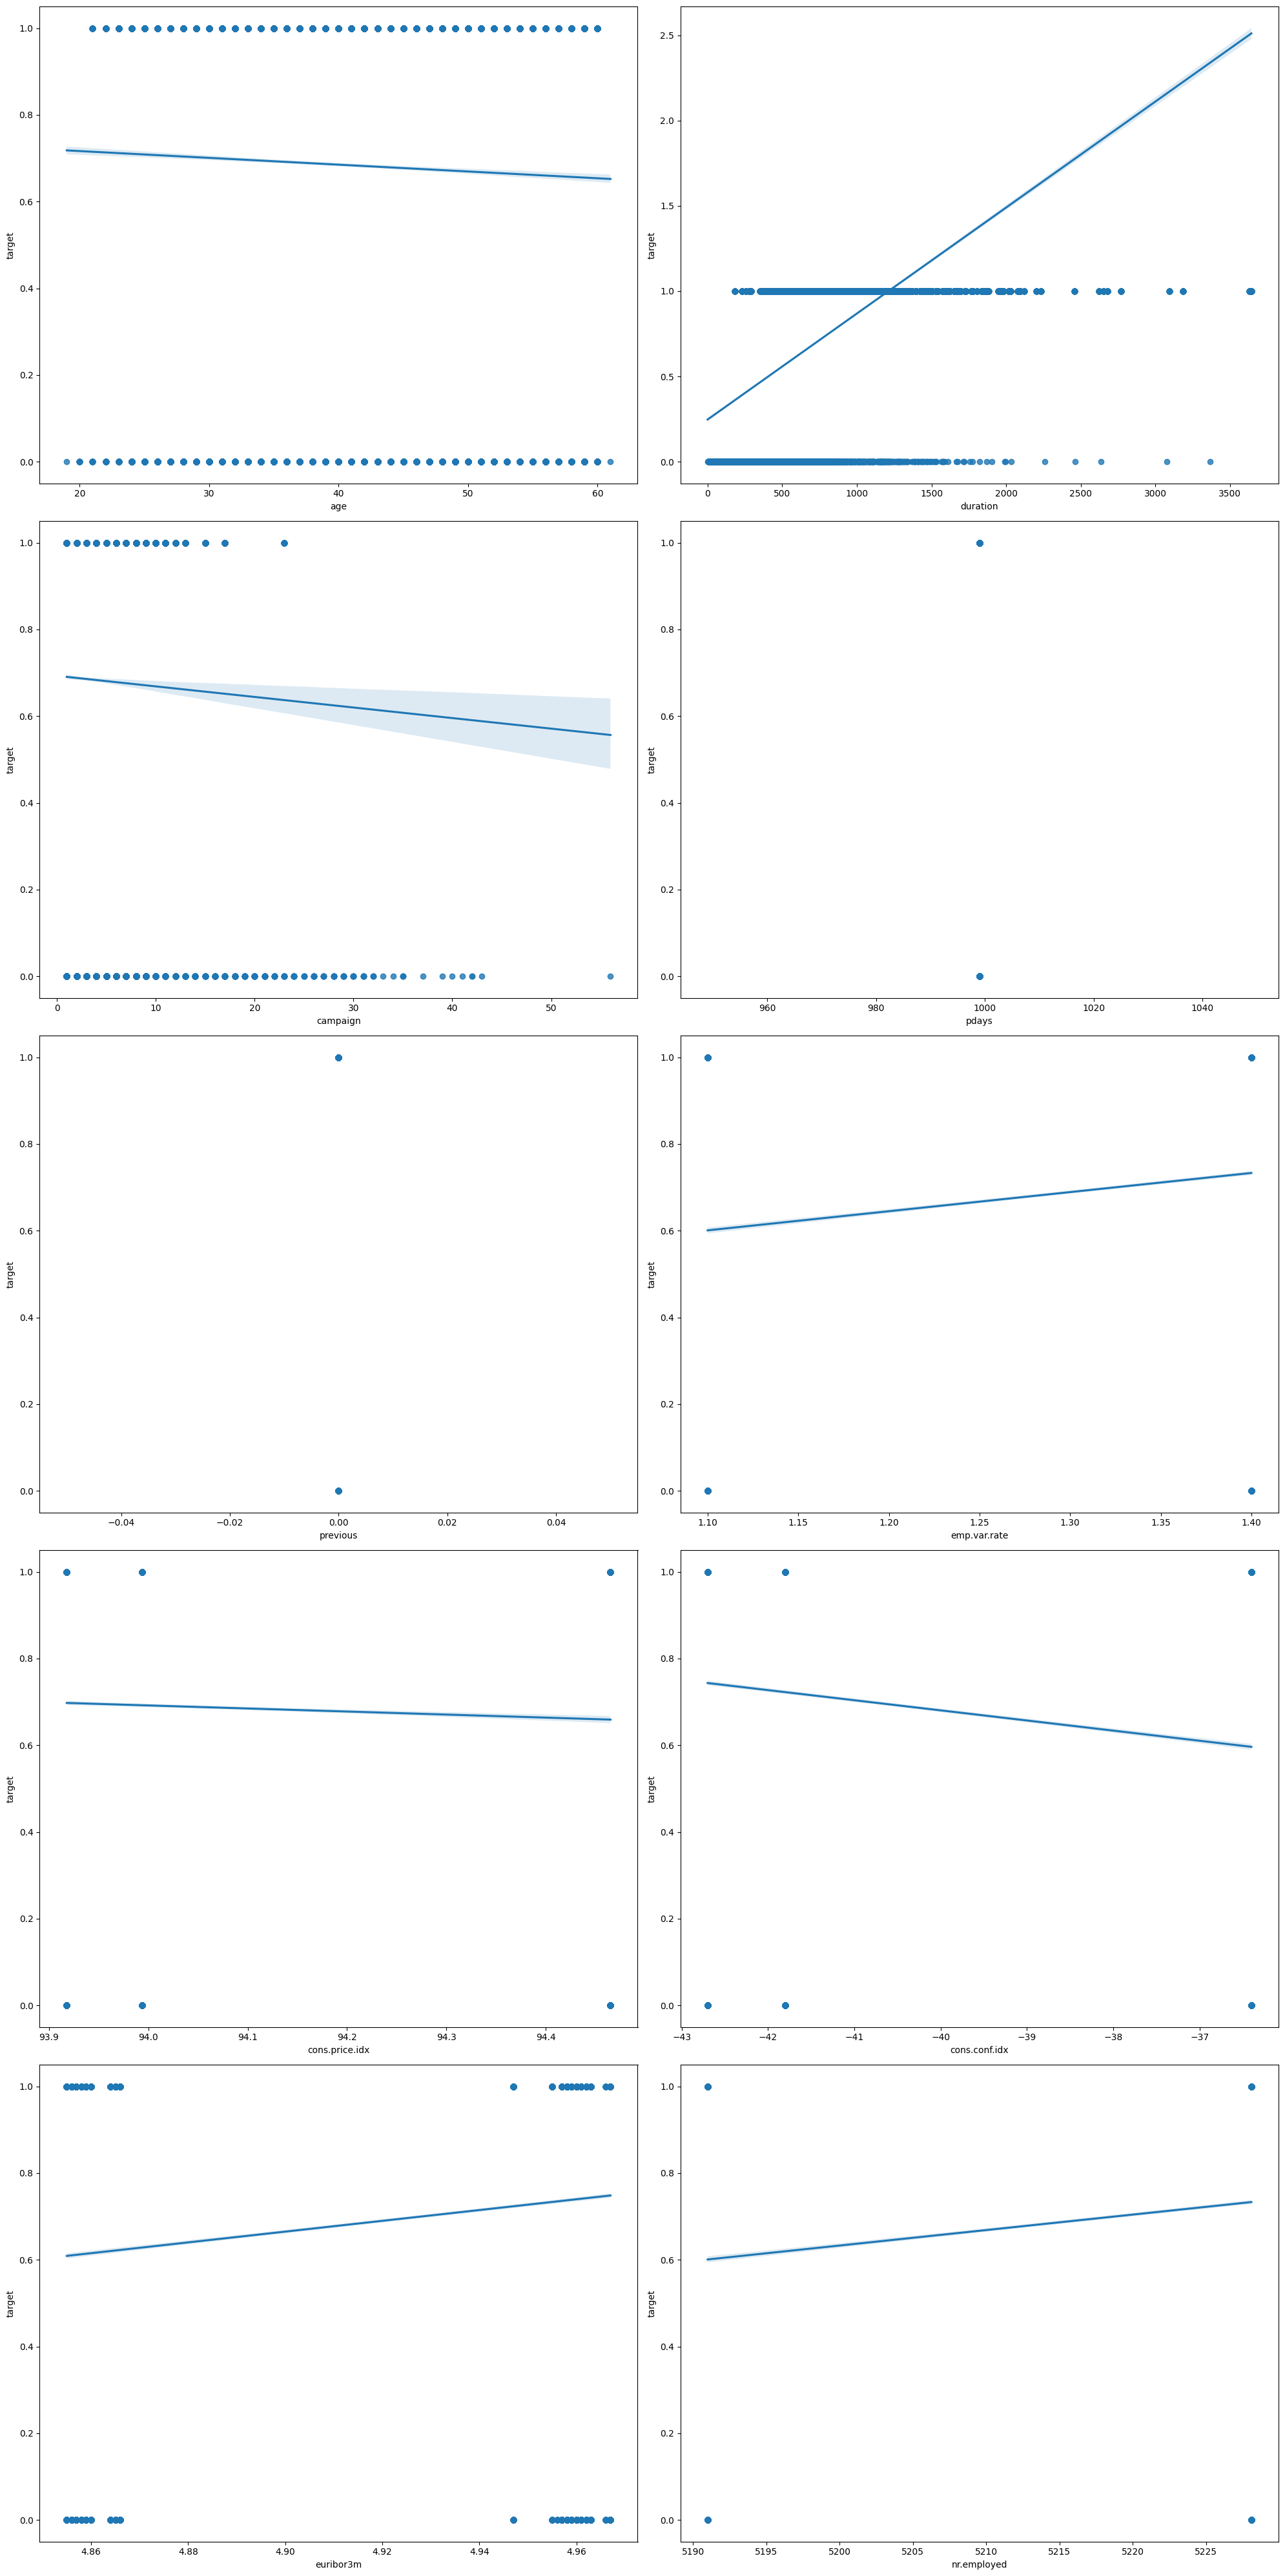

In [ ]:
numeric_columns={0:'age',1:'duration',2:'campaign',3:'pdays',4:'previous',5:'emp.var.rate',6:'cons.price.idx',7:'cons.conf.idx',8:'euribor3m',9:'nr.employed'}

plt.figure(figsize=(20,40))
plot_num = 1
for col in numeric_columns:
    plt.subplot(5,2,plot_num)
    sns.regplot(x=df_upsampled[numeric_columns[col]],y="target",data=df_upsampled)
    plot_num += 1
    plt.tight_layout()


In [ ]:
df_upsampled.dtypes

age                 int64
job                 int64
marital             int64
education           int64
has-credit          int64
housing-loan        int64
personal-loan       int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

# visualization of categorical

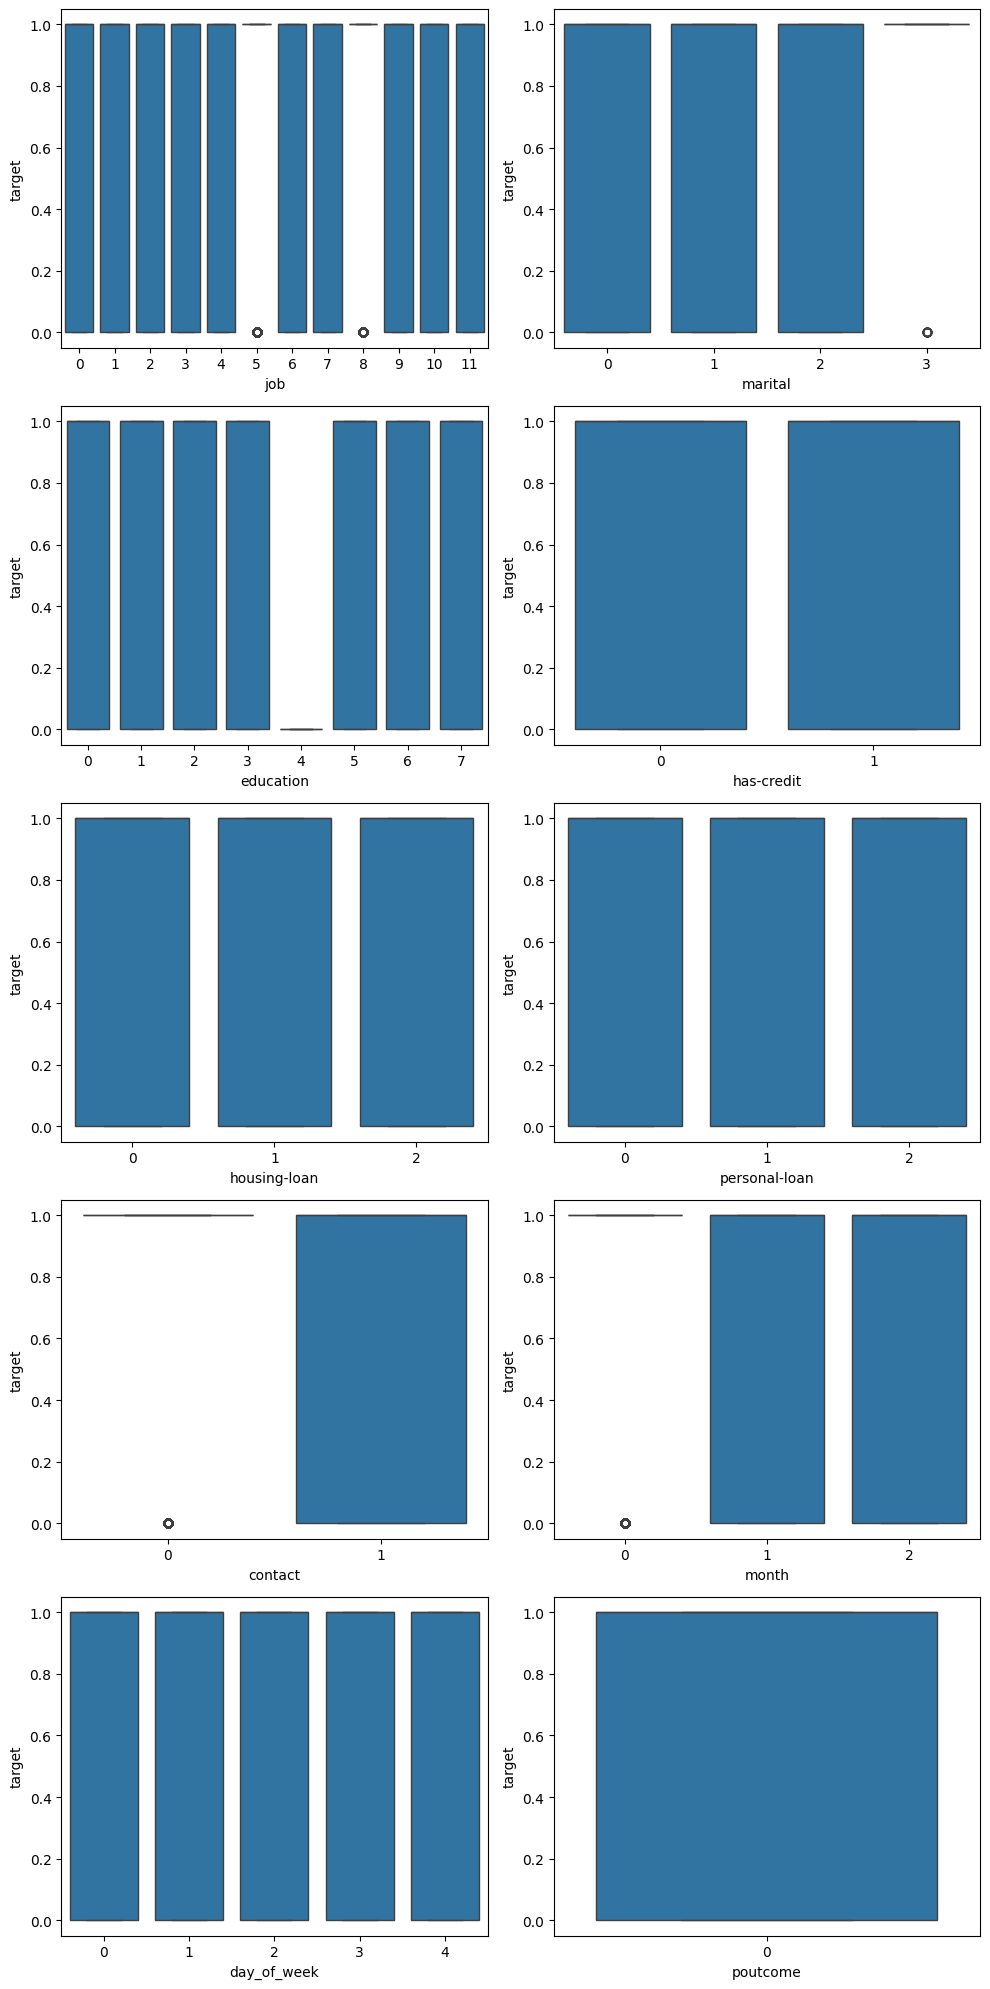

In [ ]:
catagorial_columns={0:"job",1:"marital",2:"education",3:"has-credit",4:"housing-loan",5:"personal-loan",6:"contact",7:"month",8:"day_of_week",9:"poutcome"}

plt.figure(figsize=(10,20))
plot_num = 1
for col in catagorial_columns:
    plt.subplot(5,2,plot_num)
    sns.boxplot(x=df_upsampled[catagorial_columns[col]],y="target",data=df_upsampled)
    plot_num += 1
    plt.tight_layout()


# standarization

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
scaled_standard =sc.fit_transform(df_upsampled)
scaled_standard_df = pd.DataFrame(scaled_standard, columns=df_upsampled.columns)
print("\nStandardized Data:")
print(scaled_standard_df)


Standardized Data:
            age       job   marital  education  has-credit  housing-loan  \
0     -0.131812 -0.725719  1.368995   1.244905    1.584784     -0.965887   
1      0.079395 -1.013615 -0.281834  -0.180229   -0.631001      1.054866   
2      1.346633  0.425865 -0.281834  -1.605363   -0.631001     -0.965887   
3      1.874648  1.001658 -1.932663  -0.180229   -0.631001      1.054866   
4     -0.343018  1.577450 -0.281834   0.769860   -0.631001     -0.965887   
...         ...       ...       ...        ...         ...           ...   
53251  2.085855 -1.013615 -1.932663  -0.180229   -0.631001      1.054866   
53252  1.663442 -1.013615 -1.932663   1.244905   -0.631001      1.054866   
53253 -0.554224 -0.725719  1.368995  -0.180229   -0.631001      1.054866   
53254  1.874648 -1.013615 -0.281834   1.244905   -0.631001     -0.965887   
53255  0.079395 -0.725719 -0.281834  -1.605363   -0.631001      1.054866   

       personal-loan   contact     month  day_of_week  ...  campaig

In [ ]:
df_upsampled.isna().sum()

age               0
job               0
marital           0
education         0
has-credit        0
housing-loan      0
personal-loan     0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [ ]:
df_upsampled.nunique()

age                 43
job                 12
marital              4
education            8
has-credit           2
housing-loan         3
personal-loan        3
contact              2
month                3
day_of_week          5
duration          1296
campaign            42
pdays                1
previous             1
poutcome             1
emp.var.rate         2
cons.price.idx       3
cons.conf.idx        3
euribor3m           21
nr.employed          2
target               2
dtype: int64

# correlation

In [ ]:
#strong negative
df_upsampled[["nr.employed", "target"]].corr()           #pdays  emp.var.rate  cons.price.idx  euribor3m

,nr.employed,target
nr.employed,1.000000,-0.467814
target,-0.467814,1.000000


<Axes: xlabel='nr.employed', ylabel='target'>

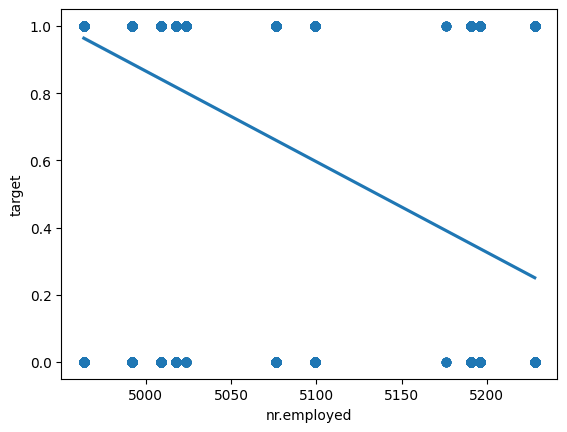

In [ ]:
sns.regplot(x="nr.employed", y="target", data=df_upsampled)

In [ ]:
#strong positive
df_upsampled[["duration", "target"]].corr()     #poutcome   previous

,duration,target
duration,1.000000,0.458411
target,0.458411,1.000000


<Axes: xlabel='duration', ylabel='target'>

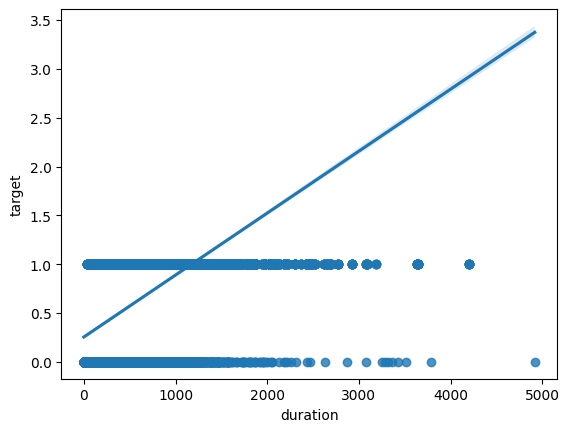

In [ ]:
sns.regplot(x="duration", y="target", data=df_upsampled)

<Axes: xlabel='previous', ylabel='target'>

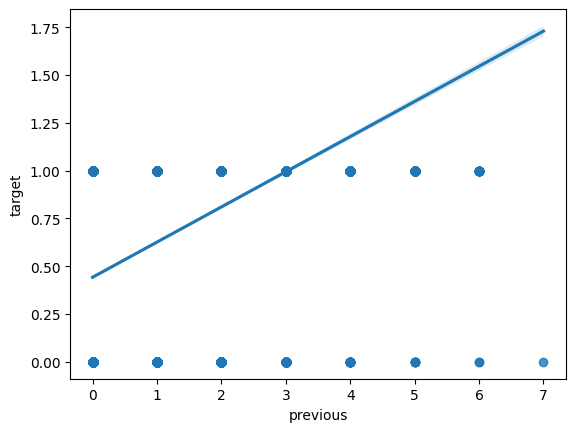

In [ ]:
sns.regplot(x="previous", y="target", data=df_upsampled)

In [ ]:
#weak relation
df_upsampled[["education", "target"]].corr()   #day_of_week

,education,target
education,1.000000,0.093685
target,0.093685,1.000000


<Axes: xlabel='education', ylabel='target'>

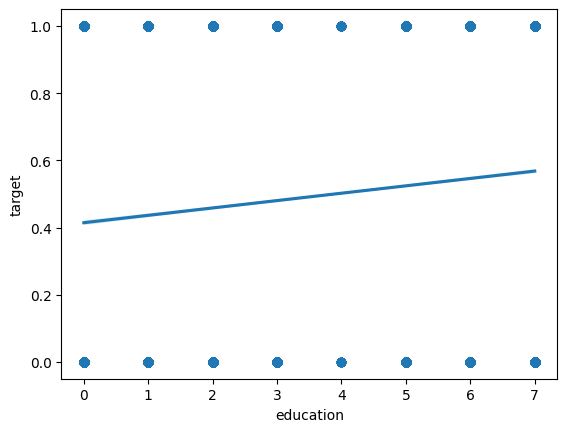

In [ ]:
sns.regplot(x="education", y="target", data=df_upsampled)

In [ ]:
df_upsampled.corr()

,age,job,marital,education,has-credit,housing-loan,personal-loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1.000000,-0.010290,-0.432932,-0.158023,0.120210,0.002771,-0.001028,-0.008776,-0.025242,0.002254,...,-0.007499,-0.065998,0.065394,0.034389,-0.052795,-0.021556,0.144831,-0.048196,-0.077311,0.037890
job,-0.010290,1.000000,0.047330,0.090507,-0.033739,0.013944,0.002936,-0.035466,-0.013718,-0.006162,...,-0.011409,-0.039599,0.045406,0.008540,-0.032741,-0.014768,0.050454,-0.036449,-0.052695,0.039429
marital,-0.432932,0.047330,1.000000,0.128073,-0.087512,0.012388,0.000111,-0.060961,-0.004109,-0.001626,...,-0.018799,-0.035311,0.032645,0.014224,-0.101769,-0.063188,-0.022441,-0.106265,-0.094566,0.071581
education,-0.158023,0.090507,0.128073,1.000000,-0.185068,0.019592,0.003375,-0.102066,-0.060326,-0.017935,...,-0.003619,-0.071044,0.070926,0.035702,-0.090585,-0.073044,0.062337,-0.088203,-0.096768,0.093685
has-credit,0.120210,-0.033739,-0.087512,-0.185068,1.000000,-0.019878,-0.000604,0.168453,-0.011950,-0.018351,...,0.054659,0.126069,-0.133895,-0.031229,0.273166,0.174749,-0.005718,0.272136,0.264043,-0.180079
housing-loan,0.002771,0.013944,0.012388,0.019592,-0.019878,1.000000,0.042995,-0.071828,-0.022381,-0.000665,...,-0.007082,-0.015256,0.016598,0.004171,-0.053739,-0.063721,-0.027488,-0.053881,-0.040350,0.016297
personal-loan,-0.001028,0.002936,0.000111,0.003375,-0.000604,0.042995,1.000000,-0.004100,-0.004409,-0.008685,...,0.006917,-0.005018,-0.002542,0.000841,0.008969,0.005890,-0.014784,0.006490,0.009108,-0.011690
contact,-0.008776,-0.035466,-0.060961,-0.102066,0.168453,-0.071828,-0.004100,1.000000,0.203098,-0.011410,...,0.108255,0.161520,-0.210511,0.017448,0.418969,0.488738,0.143836,0.435604,0.329998,-0.247988
month,-0.025242,-0.013718,-0.004109,-0.060326,-0.011950,-0.022381,-0.004409,0.203098,1.000000,0.010611,...,-0.061831,-0.080944,0.106205,-0.002247,-0.137714,0.021009,0.068729,-0.094493,-0.205854,-0.013203
day_of_week,0.002254,-0.006162,-0.001626,-0.017935,-0.018351,-0.000665,-0.008685,-0.011410,0.010611,1.000000,...,-0.050061,-0.016651,0.016237,0.017522,0.017771,0.012642,0.021560,0.016545,0.002856,0.025009


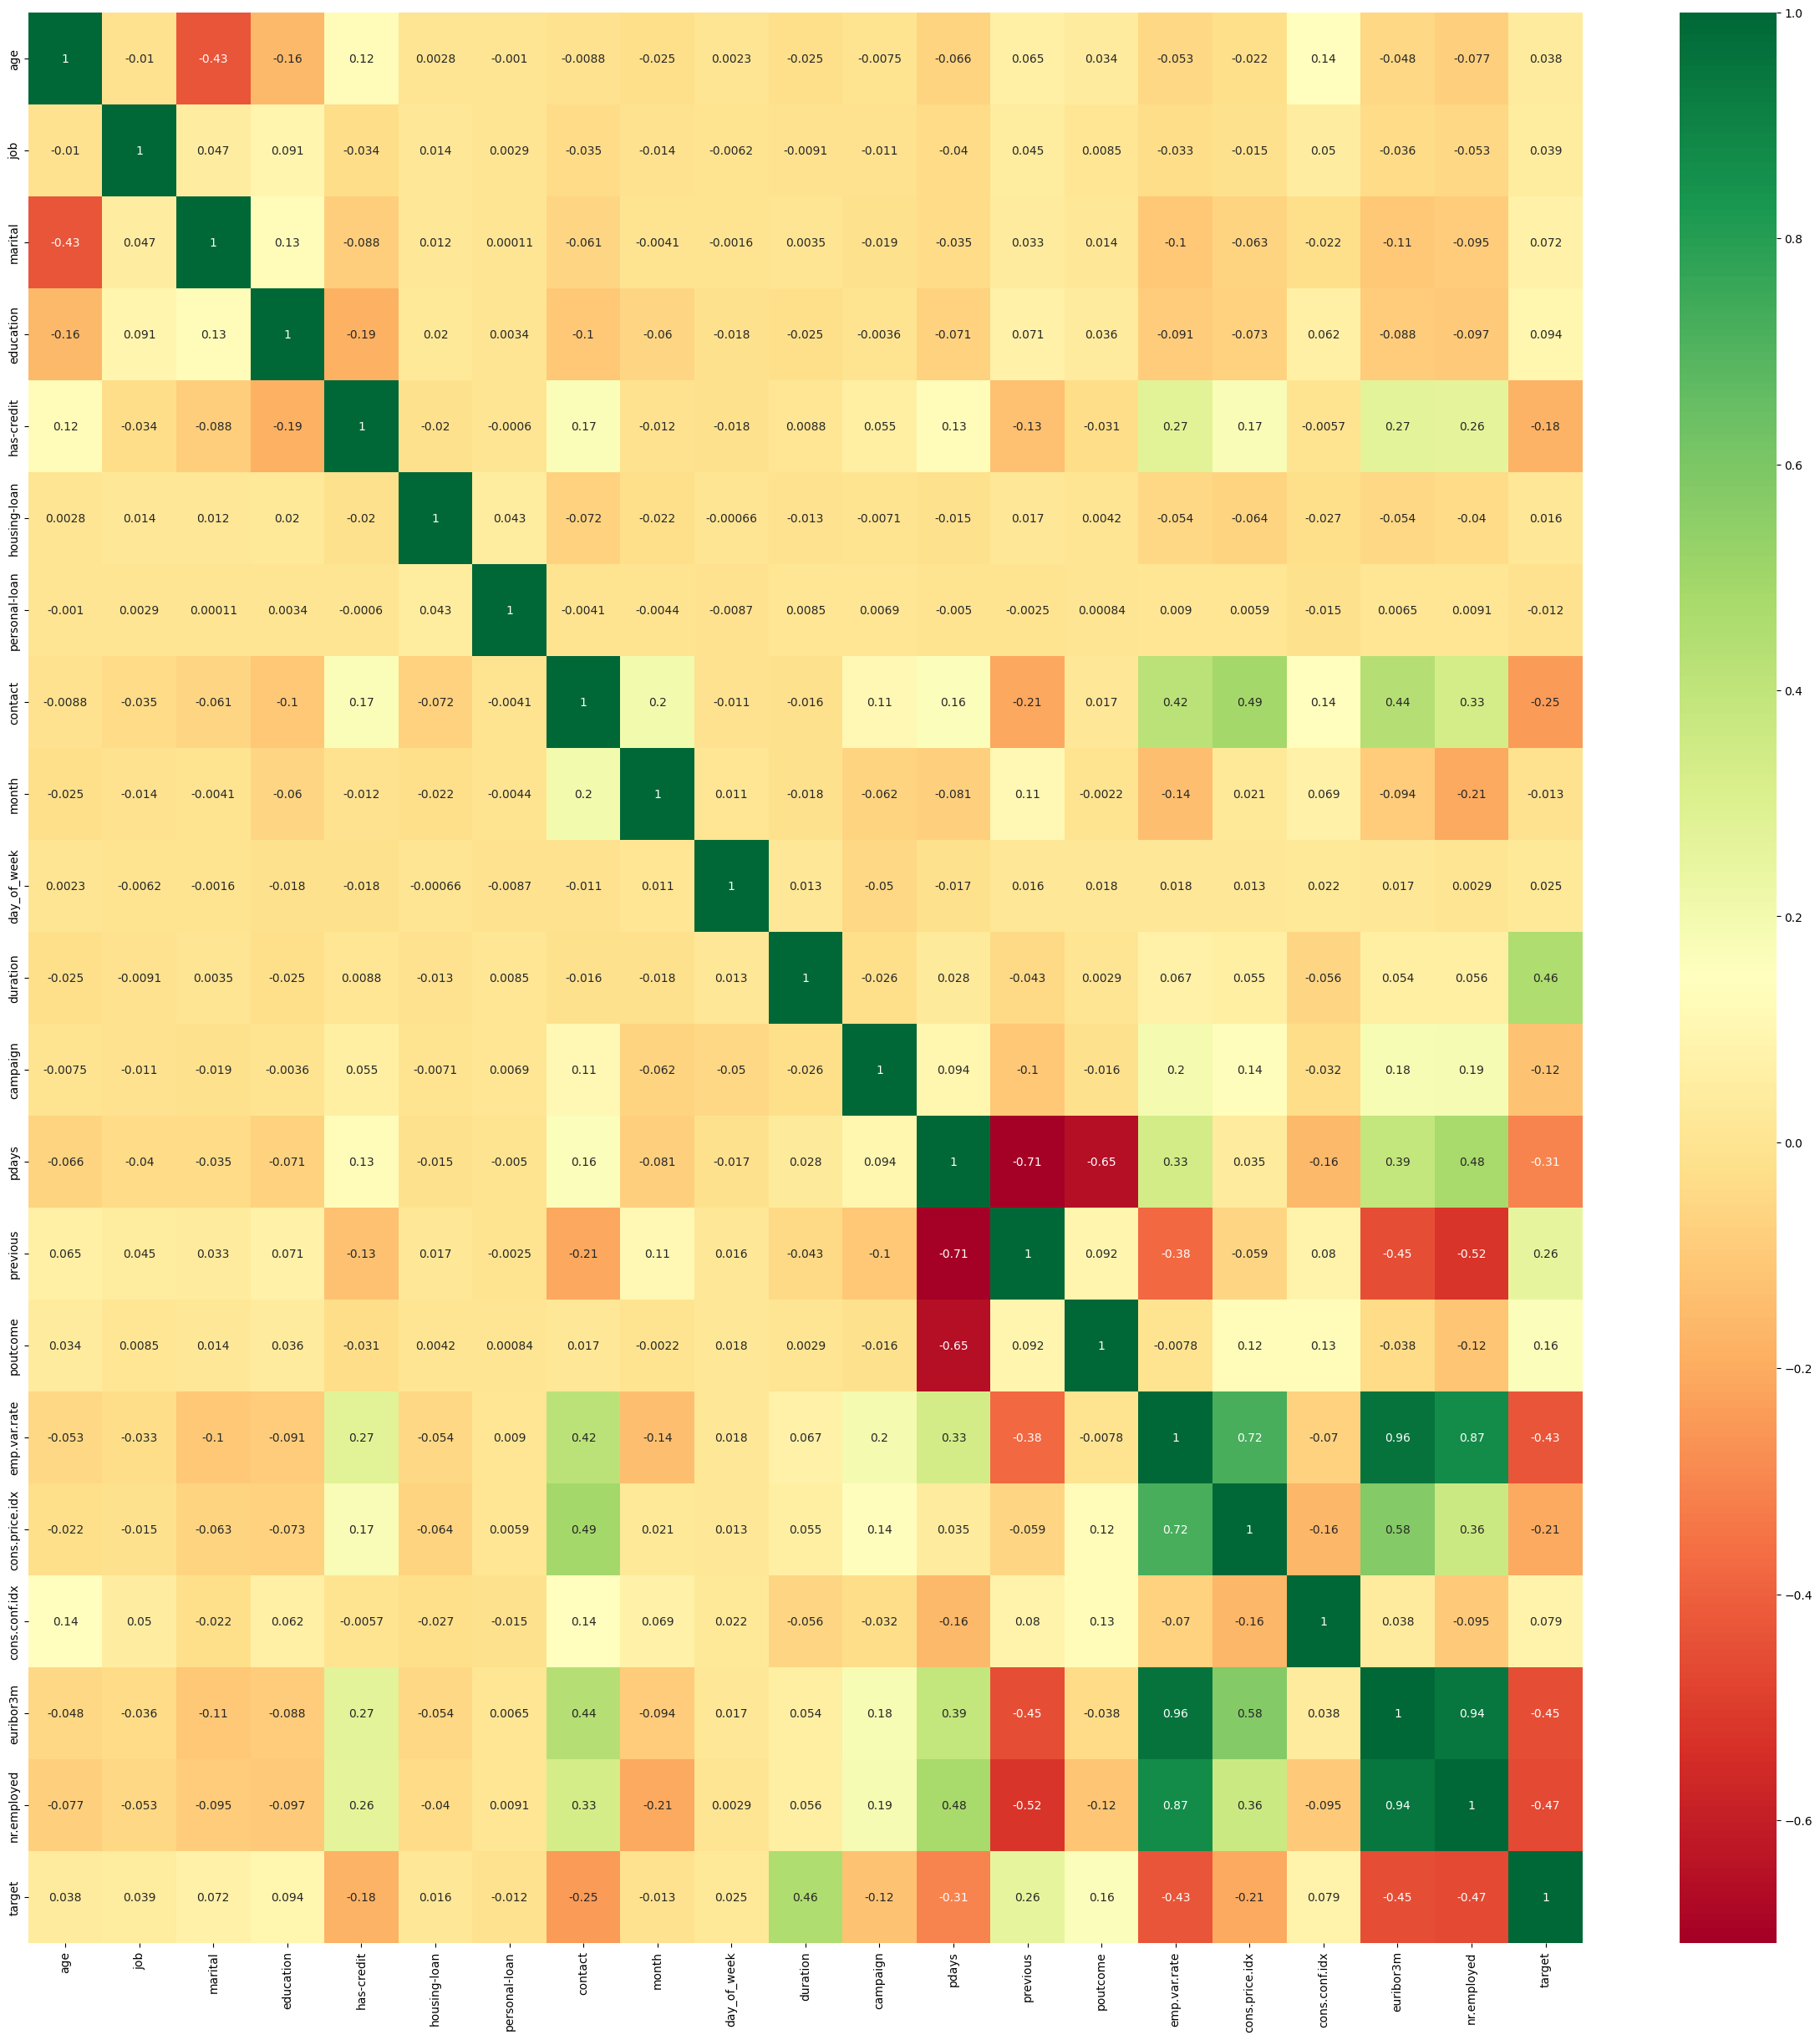

In [ ]:
plt.subplots(figsize=(30,30))
sns.heatmap(df_upsampled.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Grouping

In [ ]:
df_group_one = df_upsampled[['has-credit','education','previous','nr.employed','target']]

In [ ]:
df_group_one = df_group_one.groupby(['has-credit'],as_index=False).mean()
df_group_one

,has-credit,education,previous,nr.employed,target
0,0,4.074151,0.353135,5125.659413,0.538935
1,1,2.988885,0.095693,5188.540952,0.291942
2,2,4.333333,0.333333,5217.333333,0.000000


In [ ]:
grouped_pivot = pd.pivot_table(df_group_one, index='has-credit', columns='previous', values='nr.employed')
grouped_pivot

previous,0.095693,0.333333,0.353135
has-credit,,,
0,NaN,NaN,5125.659413
1,5188.540952,NaN,NaN
2,NaN,5217.333333,NaN


In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

previous,0.095693,0.333333,0.353135
has-credit,,,
0,0.000000,0.000000,5125.659413
1,5188.540952,0.000000,0.000000
2,0.000000,5217.333333,0.000000


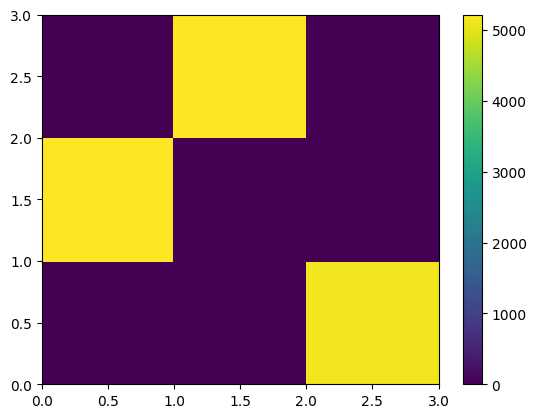

In [ ]:
plt.pcolor(grouped_pivot)
plt.colorbar()
plt.show()

# Building models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('target',axis=1),
                                                    df_upsampled['target'], test_size=0.40,
                                                    random_state=None)

In [ ]:
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 29239
number of training samples: 43857


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logist_model = LogisticRegression()

In [ ]:
logist_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
LG_pred = logist_model.predict(X_test)

LG_accuracy = accuracy_score(y_test, LG_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,LG_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14633
           1       0.85      0.85      0.85     14606

    accuracy                           0.85     29239
   macro avg       0.85      0.85      0.85     29239
weighted avg       0.85      0.85      0.85     29239



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

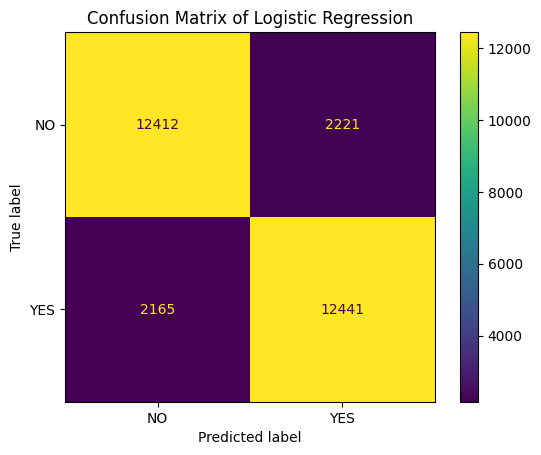

In [ ]:
log_matrix = confusion_matrix(y_test,LG_pred)
log_display = ConfusionMatrixDisplay(confusion_matrix = log_matrix, display_labels = ['NO','YES'])
log_display.plot()
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

# Gridsearch fine_tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param = [{'penalty':['l1','l2','15']},
              {'C':[1, 10, 100, 1000]}]

grid = GridSearchCV(LogisticRegression(), param, refit = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('target',axis=1),
                                                    df_upsampled['target'], test_size=0.30,
                                                    random_state=None)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', '15']},
                         {'C': [1, 10, 100, 1000]}])

In [ ]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

{'C': 1000}


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     11004
           1       0.85      0.86      0.86     10925

    accuracy                           0.86     21929
   macro avg       0.86      0.86      0.86     21929
weighted avg       0.86      0.86      0.86     21929



# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('target',axis=1),
                                                    df_upsampled['target'], test_size=0.30,
                                                    random_state=None)

In [ ]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=5) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
DT_pred = DecisionTreeClassifierModel.predict(X_test)
DT_accuracy = accuracy_score(y_test, DT_pred)

In [ ]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     11025
           1       0.84      0.93      0.88     10904

    accuracy                           0.88     21929
   macro avg       0.88      0.88      0.88     21929
weighted avg       0.88      0.88      0.88     21929



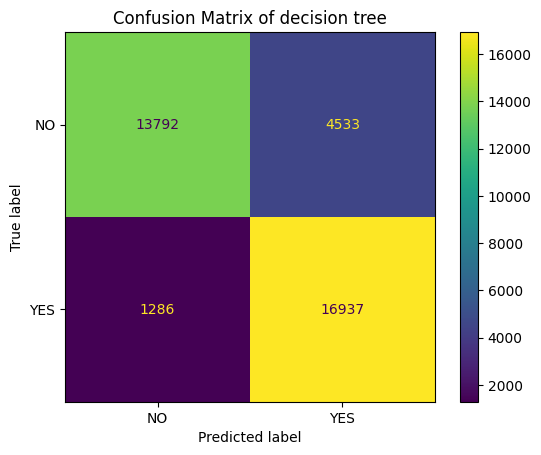

In [ ]:
tree_matrix = confusion_matrix(y_test,DT_pred)
tree_display = ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['NO','YES'])
tree_display.plot()
plt.title("Confusion Matrix of decision tree")
plt.show()

# Grid

In [ ]:
param={'criterion':['entropy','gini'],
        'max_depth':[3,4,6],
      'random_state':[5,200,100]}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(), param, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=entropy, max_depth=3, random_state=5;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, random_state=5;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, random_state=5;, score=0.841 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, random_state=5;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, random_state=5;, score=0.839 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, random_state=200;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, random_state=200;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, random_state=200;, score=0.841 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, random_state=200;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, random_state=200;, score=0.839 total time=   0.1s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 6],
                         'random_state': [5, 200, 100]},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'random_state': 5}


In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     18325
           1       0.86      0.92      0.89     18223

    accuracy                           0.88     36548
   macro avg       0.89      0.88      0.88     36548
weighted avg       0.89      0.88      0.88     36548



# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_model = RandomForestClassifier(n_estimators=500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('target',axis=1),
                                                    df_upsampled['target'], test_size=0.30,
                                                    random_state=None)
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
RF_predictions=random_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_predictions)

In [ ]:
RF_accuracy

0.9647954763099093

In [ ]:
print(classification_report(y_test,RF_predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11061
           1       0.93      1.00      0.97     10868

    accuracy                           0.96     21929
   macro avg       0.97      0.97      0.96     21929
weighted avg       0.97      0.96      0.96     21929



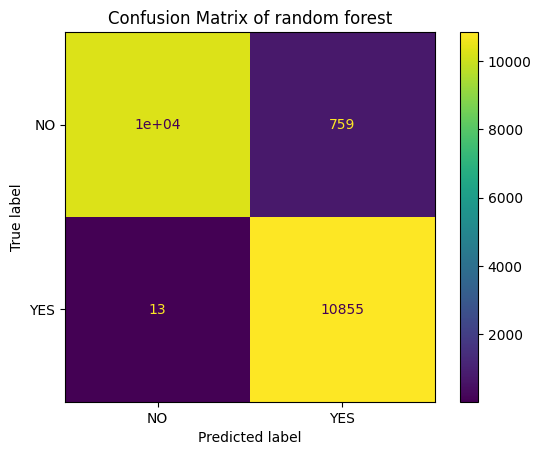

In [ ]:
random_matrix = confusion_matrix(y_test,RF_predictions)
random_display = ConfusionMatrixDisplay(confusion_matrix = random_matrix, display_labels = ['NO','YES'])
random_display.plot()
plt.title("Confusion Matrix of random forest")
plt.show()

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('target',axis=1),
                                                    df_upsampled['target'], test_size=0.30,
                                                    random_state=None)
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
SVC_predictions = model.predict(X_test)
SVC_accuracy = accuracy_score(y_test, SVC_predictions)

In [ ]:
print(classification_report(y_test,SVC_predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     11026
           1       0.83      0.86      0.85     10903

    accuracy                           0.85     21929
   macro avg       0.85      0.85      0.85     21929
weighted avg       0.85      0.85      0.85     21929



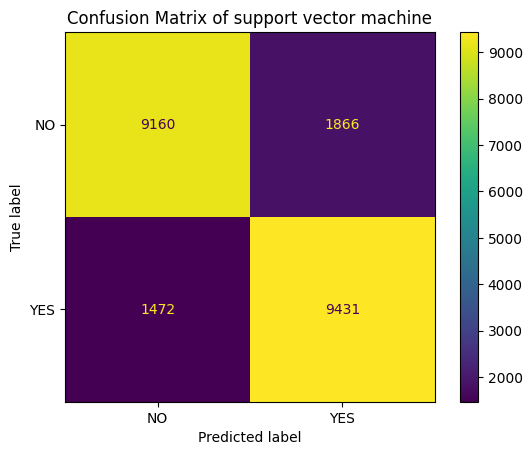

In [ ]:
svc_matrix = confusion_matrix(y_test,SVC_predictions)
svc_display = ConfusionMatrixDisplay(confusion_matrix = svc_matrix, display_labels = ['NO','YES'])
svc_display.plot()
plt.title("Confusion Matrix of support vector machine")
plt.show()

# Grid

In [ ]:
param = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01]}

In [ ]:
grid = GridSearchCV(SVC(),param,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.509 total time= 4.8min
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.510 total time= 4.5min
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.509 total time= 4.2min
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.507 total time= 4.4min
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.509 total time= 4.3min
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.602 total time= 2.4min
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.595 total time= 2.4min
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.640 total time= 2.4min
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.606 total time= 2.4min
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.599 total time= 2.3min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.878 total time= 2.5min
[CV 2/5] END .................C=0.1, gamma=0.01;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 1, 'gamma': 1}


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

# clustring

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['duration', 'previous', 'poutcome', 'nr.employed', 'pdays']
X = df_upsampled[features]

In [ ]:
# Handle missing values
X.fillna(X.median(), inplace=True)

<ipython-input-162-cb094b235d0c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_upsampled['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



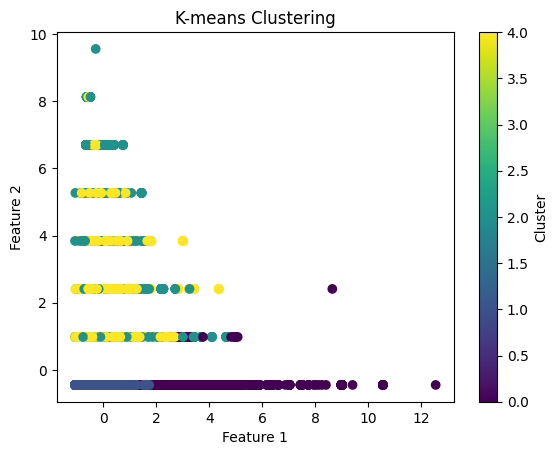

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_upsampled['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

## Models Accuracy comparison

In [ ]:
import plotly.express as px

# Assume we have the accuracy scores for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [LG_accuracy, DT_accuracy, RF_accuracy, SVC_accuracy]

# Create a dictionary of data
data = {'Model': models, 'Accuracy Score': accuracy_scores}

# Create a figure
fig = px.bar(data, x='Model', y='Accuracy Score',title='Comparison of Accuracy Scores for Four Machine Learning Models')

# Set figure size
fig.update_layout(width=600, height=400)

# Show the plot
fig.show()